In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# **Carga del dataset y preprocesamiento:**
* Cargar el dataset Fashion MNIST en TensorFlow/Keras.
* Normalizar los datos para que los valores de los píxeles estén entre 0 y 1.

In [ ]:
# Cargar el dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizar los valores de píxeles a un rango entre 0 y 1
train_images = train_images / 255.0
test_images = test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Visualización de los datos:**
* Mostrar algunas imágenes del conjunto de entrenamiento con sus etiquetas correspondientes para entender el tipo de datos que se van a clasificar.

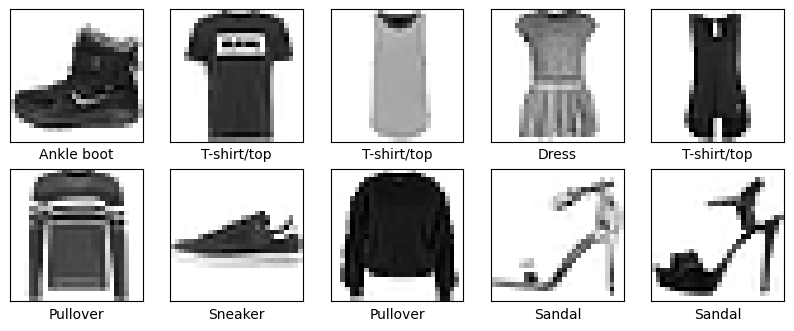

In [ ]:
# Etiquetas correspondientes a cada clase
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Mostrar las primeras 10 imágenes de entrenamiento con sus etiquetas
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Construcción del modelo inicial:**
* Crear un modelo de red neuronal con una capa oculta utilizando Keras.
* Entrenar el modelo durante 10 épocas y observar su precisión en el conjunto de validación.

In [ ]:
# Construcción del modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en un vector de 784 elementos
    layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y función de activación ReLU
    layers.Dense(10, activation='softmax')  # Capa de salida con 10 neuronas (una para cada clase) y softmax
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)  # 20% para validación

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nPrecisión en el conjunto de prueba:", test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7678 - loss: 0.6664 - val_accuracy: 0.8451 - val_loss: 0.4259
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8596 - loss: 0.3957 - val_accuracy: 0.8643 - val_loss: 0.3738
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8741 - loss: 0.3455 - val_accuracy: 0.8745 - val_loss: 0.3514
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8842 - loss: 0.3178 - val_accuracy: 0.8745 - val_loss: 0.3462
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8896 - loss: 0.2973 - val_accuracy: 0.8777 - val_loss: 0.3356
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8946 - loss: 0.2826 - val_accuracy: 0.8826 - val_loss: 0.3260
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8994 - loss: 0.2660 - val_accuracy: 0.8869 - val_loss: 0.3171
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9043 - loss: 0.2515 - 

# **Fine-tuning: Realiza los siguientes ajustes en el modelo y observa cómo cambian los resultados. Busca cómo implementar cada uno de estos cambios en la red neuronal:**
* Prueba 1: Aumenta el número de neuronas en las capas ocultas y agrega más capas densas.
* Prueba 2: Implementa Dropout para reducir el sobreajuste.
* Prueba 3: Cambia el optimizador por otro (por ejemplo, RMSprop o SGD) y ajusta la tasa de aprendizaje.

## **Prueba 1:**

In [ ]:
# Construcción del nuevo modelo con más neuronas y capas ocultas
model_finetuned = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes de 28x28 píxeles
    layers.Dense(128, activation='relu'),  # Primera capa oculta
    layers.Dense(64, activation='relu'),  # Segunda capa oculta
    layers.Dense(32, activation='softmax')  # Capa de salida con 10 neuronas y softmax
])

# Compilar el modelo ajustado
model_finetuned.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Entrenar el modelo ajustado
history_finetuned = model_finetuned.fit(train_images, train_labels, epochs=20, validation_split=0.2)

# Evaluar el modelo ajustado en el conjunto de prueba
test_loss_finetuned, test_acc_finetuned = model_finetuned.evaluate(test_images, test_labels, verbose=2)

print("\nPrecisión en el conjunto de prueba (modelo ajustado):", test_acc_finetuned)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7532 - loss: 0.7253 - val_accuracy: 0.8524 - val_loss: 0.4189
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8579 - loss: 0.3946 - val_accuracy: 0.8590 - val_loss: 0.3888
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8740 - loss: 0.3496 - val_accuracy: 0.8561 - val_loss: 0.3903
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8799 - loss: 0.3183 - val_accuracy: 0.8723 - val_loss: 0.3534
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8881 - loss: 0.2982 - val_accuracy: 0.8761 - val_loss: 0.3400
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8938 - loss: 0.2818 - val_accuracy: 0.8792 - val_loss: 0.3388
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8937 - loss: 0.2808 - val_accuracy: 0.8764 - val_loss: 0.3544
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9016 - loss: 0.2608 - 

## **Prueba 2:**

In [ ]:
# Construcción del modelo con Dropout
model_with_dropout = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28
    layers.Dense(256, activation='relu'),  # Primera capa oculta con 256 neuronas
    layers.Dropout(0.3),  # Dropout del 30% para reducir el sobreajuste
    layers.Dense(128, activation='relu'),  # Segunda capa oculta con 128 neuronas
    layers.Dropout(0.3),  # Dropout del 30% nuevamente
    layers.Dense(64, activation='relu'),   # Tercera capa oculta con 64 neuronas
    layers.Dropout(0.3),  # Dropout del 30% en la tercera capa
    layers.Dense(32, activation='softmax')  # Capa de salida con 10 neuronas (clasificación)
])

# Compilar el modelo
model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Entrenamiento del modelo con Dropout
history_with_dropout = model_with_dropout.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss_with_dropout, test_acc_with_dropout = model_with_dropout.evaluate(test_images, test_labels, verbose=2)

print("\nPrecisión en el conjunto de prueba (modelo con Dropout):", test_acc_with_dropout)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6593 - loss: 1.0254 - val_accuracy: 0.8421 - val_loss: 0.4347
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8248 - loss: 0.4944 - val_accuracy: 0.8508 - val_loss: 0.4032
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8415 - loss: 0.4470 - val_accuracy: 0.8619 - val_loss: 0.3871
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8491 - loss: 0.4240 - val_accuracy: 0.8665 - val_loss: 0.3666
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8564 - loss: 0.3998 - val_accuracy: 0.8670 - val_loss: 0.3645
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8614 - loss: 0.3852 - val_accuracy: 0.8680 - val_loss: 0.3653
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8693 - loss: 0.3652 - val_accuracy: 0.8758 - val_loss: 0.3447
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8695 - loss: 0.3675 - 

## **Prueba 3:**

In [ ]:
# Construcción del modelo con RMSprop y tasa de aprendizaje ajustada
model_rmsprop = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compilación con el optimizador RMSprop y tasa de aprendizaje ajustada
model_rmsprop.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),  # Tasa de aprendizaje ajustada
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Entrenar el modelo
history_rmsprop = model_rmsprop.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Evaluar el modelo
test_loss_rmsprop, test_acc_rmsprop = model_rmsprop.evaluate(test_images, test_labels, verbose=2)

print("\nPrecisión en el conjunto de prueba (RMSprop):", test_acc_rmsprop)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6754 - loss: 0.9168 - val_accuracy: 0.8348 - val_loss: 0.4553
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8203 - loss: 0.5257 - val_accuracy: 0.8386 - val_loss: 0.4510
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8381 - loss: 0.4944 - val_accuracy: 0.8605 - val_loss: 0.4156
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8399 - loss: 0.4934 - val_accuracy: 0.8551 - val_loss: 0.4251
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8414 - loss: 0.4940 - val_accuracy: 0.8558 - val_loss: 0.4197
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8431 - loss: 0.5032 - val_accuracy: 0.8664 - val_loss: 0.4139
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8480 - loss: 0.5015 - val_accuracy: 0.8581 - val_loss: 0.4757
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8436 - loss: 0.5149 - 

# **Evaluación:**
* Evalúa cada modelo en el conjunto de prueba y compara las precisiones obtenidas.
* Genera gráficas que muestran cómo cambian la precisión y la pérdida durante el entrenamiento.

Gráfica para modelo inicial:


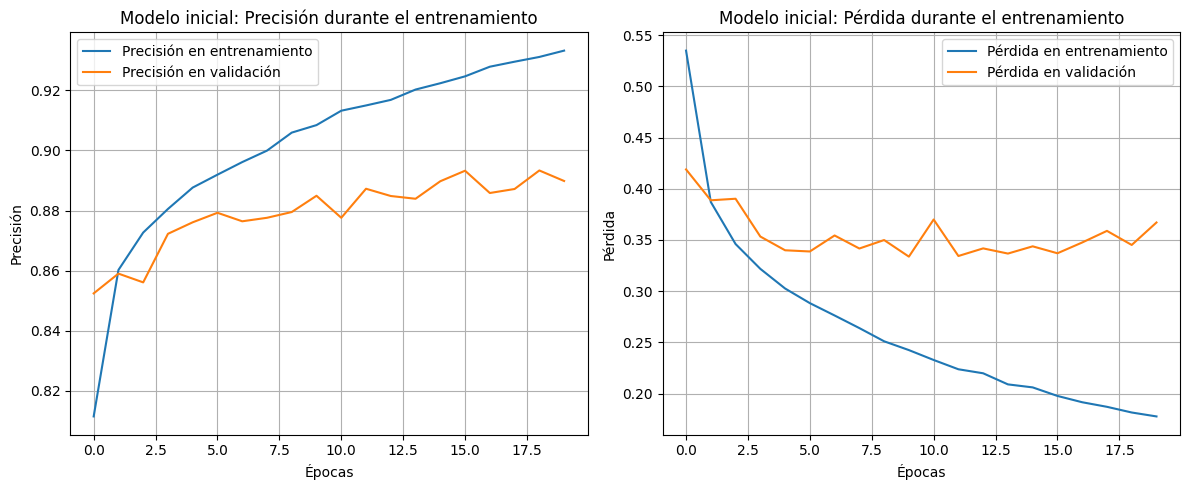

Gráfica para modelo inicial con Dropout:


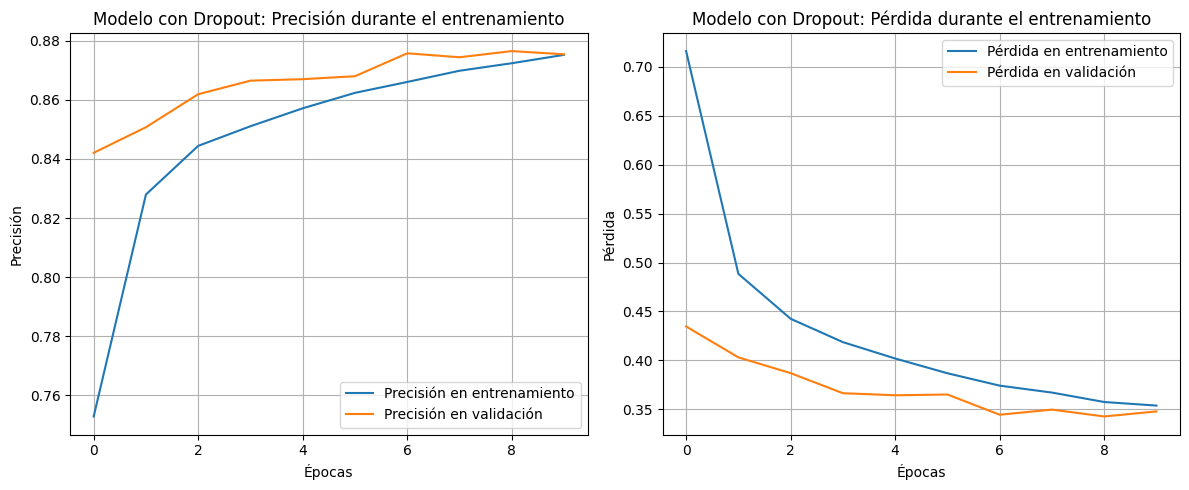

Gráfica para modelo con RMSprop:


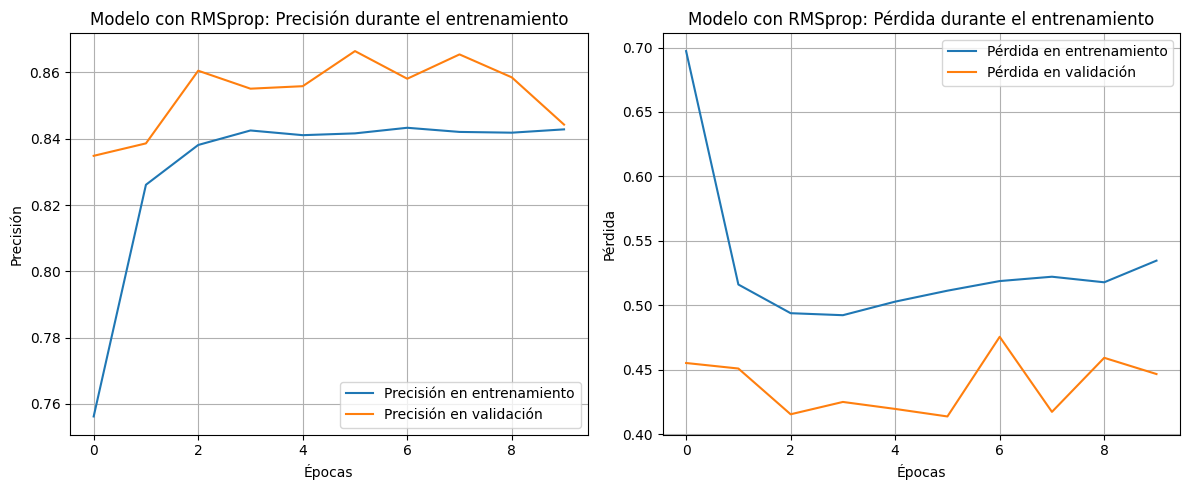

In [ ]:
# Función para graficar precisión y pérdida
def plot_metrics(history, title="Modelo"):
    # Gráfico de precisión
    plt.figure(figsize=(12, 5))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión en validación')
    plt.title(f'{title}: Precisión durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida en validación')
    plt.title(f'{title}: Pérdida durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    # Mostrar gráficos
    plt.tight_layout()
    plt.show()

# Graficar las métricas para cada prueba
print("Gráfica para modelo inicial:")
plot_metrics(history_finetuned, title="Modelo inicial")

# Graficar las métricas para cada prueba
print("Gráfica para modelo inicial con Dropout:")
plot_metrics(history_with_dropout, title="Modelo con Dropout")

print("Gráfica para modelo con RMSprop:")
plot_metrics(history_rmsprop, title="Modelo con RMSprop")